In [243]:
import pandas as pd
dfSimpleSorted = pd.read_csv('amazon_reviews_simpleBinary.csv')

In [244]:
dfSimpleSorted.head()

,Unnamed: 0,overall,reviewText
0,0,1,issues
1,1,1,purchased device worked advertised never much ...
2,2,1,works expected sprung higher capacity think ma...
3,3,1,think worked greathad diff bran gb card went s...
4,4,1,bought retail packaging arrived legit orange e...


In [245]:
# Sort the DataFrame by 'overall' in ascending order
dfSimpleSorted = dfSimpleSorted.sort_values(by='overall', ascending=True)

In [246]:
dfSimpleSorted.head()

,Unnamed: 0,overall,reviewText
1053,1054,0,would recommend card looking real class write ...
4367,4368,0,title says card got defective faulty issue sd ...
295,296,0,thus microsd card worked fine year samsumg not...
294,295,0,card got hot almost melted crazy card somewher...
894,895,0,yeah ultra hot could get devices recognize car...


In [247]:
counts = dfSimpleSorted['overall'].value_counts()
percentages = dfSimpleSorted['overall'].value_counts(normalize=True) * 100
print(counts)
print(percentages)

overall
1    4590
0     324
Name: count, dtype: int64
overall
1    93.406593
0     6.593407
Name: proportion, dtype: float64


In [248]:
from sklearn.model_selection import train_test_split

In [249]:
# Define the target size for the train set
train_size = 0.8

# Calculate the number of entries for a balanced train set
train_count = min(
    int(dfSimpleSorted[dfSimpleSorted['overall'] == 0].shape[0] * train_size), 
    int(dfSimpleSorted[dfSimpleSorted['overall'] == 1].shape[0] * train_size)
)

# Manually create a balanced train set
train_df_0 = dfSimpleSorted[dfSimpleSorted['overall'] == 0].sample(train_count, random_state=42)
train_df_1 = dfSimpleSorted[dfSimpleSorted['overall'] == 1].sample(train_count, random_state=42)

# Combine and shuffle the train set
train_df = pd.concat([train_df_0, train_df_1]).sample(frac=1, random_state=42)

# Create the test set by excluding train entries
test_df = dfSimpleSorted.drop(train_df.index)

# Verify the class distributions
print("Training set distribution:")
print(train_df['overall'].value_counts(normalize=True) * 100)

print("\nTesting set distribution:")
print(test_df['overall'].value_counts(normalize=True) * 100)


print("Tamany train:",len(train_df))
print("Tamany test:",len(test_df))
print("Tamany dataset:",len(dfSimpleSorted))

Training set distribution:
overall
0    50.0
1    50.0
Name: proportion, dtype: float64

Testing set distribution:
overall
1    98.521383
0     1.478617
Name: proportion, dtype: float64
Tamany train: 518
Tamany test: 4396
Tamany dataset: 4914


In [250]:
# Partir en Xtrain, ytrain, Xtest, ytest
X_train = train_df['reviewText']
y_train = train_df['overall']

X_test = test_df['reviewText']
y_test = test_df['overall']


# Count entries with overall = 0 in training and testing sets
train_overall_0_count = y_train[y_train == 0].count()
test_overall_0_count = y_test[y_test == 0].count()

# Print results
print(f"Entries with overall = 0 in training set: {train_overall_0_count}")
print(f"Entries with overall = 0 in testing set: {test_overall_0_count}")

# Reviews with overall = 0 --> 324
# train --> 80% of the reviews with overall = 0 (259/324)
# test --> 20% of the reviews with overall = 0 (64/324)

# trainsize = 518 (10% of Dataset)
# testsize = 4396 (90% of Dataset)

Entries with overall = 0 in training set: 259
Entries with overall = 0 in testing set: 65


In [251]:
print("Test set distribution:")
print(y_test.value_counts())

Test set distribution:
overall
1    4331
0      65
Name: count, dtype: int64


In [252]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Apply TF-IDF on the training and testing sets
X_train = tfidf.fit_transform(X_train)  # Learn vocabulary and transform train set
X_test = tfidf.transform(X_test)        # Only transform test set


In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

Training Logistic Regression...
Training Random Forest...
Training Naive Bayes (Multinomial)...
Training Naive Bayes (Bernoulli)...
Training Naive Bayes (Gaussian)...
Training Decision Tree...
Training SVM...
Training K-Nearest Neighbors...
Training Gradient Boosting...
Resultados para Logistic Regression:
Accuracy: 0.8510
Precision: 0.9989
Recall: 0.8497
F1 Score: 0.9183
ROC AUC: 0.9502


Resultados para Random Forest:
Accuracy: 0.8631
Precision: 0.9973
Recall: 0.8633
F1 Score: 0.9255
ROC AUC: 0.9299


Resultados para Naive Bayes (Multinomial):
Accuracy: 0.8098
Precision: 0.9994
Recall: 0.8074
F1 Score: 0.8932
ROC AUC: 0.9544


Resultados para Naive Bayes (Bernoulli):
Accuracy: 0.9313
Precision: 0.9936
Recall: 0.9363
F1 Score: 0.9641
ROC AUC: 0.9148


Resultados para Naive Bayes (Gaussian):
Accuracy: 0.4882
Precision: 0.9952
Recall: 0.4828
F1 Score: 0.6502
ROC AUC: 0.6645


Resultados para Decision Tree:
Accuracy: 0.7778
Precision: 0.9938
Recall: 0.7793
F1 Score: 0.8736
ROC AUC: 0.728

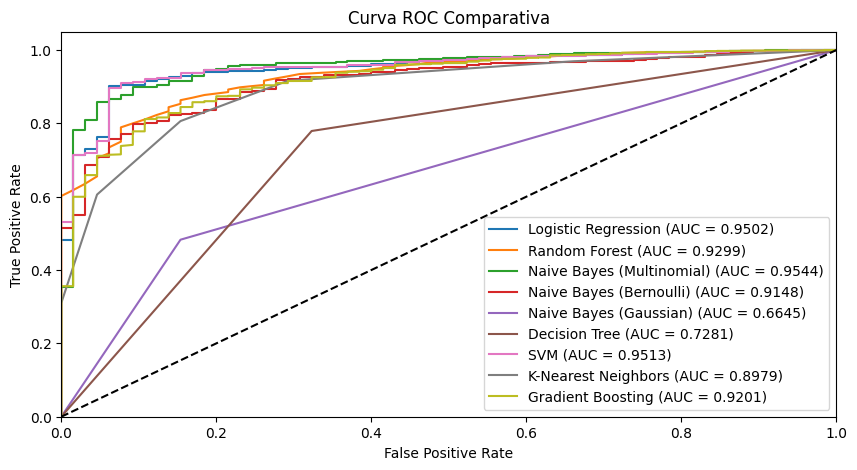

In [254]:
# Entrenar y evaluar modelos
# Define models, adding new classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "Naive Bayes (Bernoulli)": BernoulliNB(),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Handle sparse matrix for Gaussian Naive Bayes
    if model_name == "Naive Bayes (Gaussian)":
        model.fit(X_train.toarray(), y_train)
        y_pred = model.predict(X_test.toarray())
        y_pred_prob = model.predict_proba(X_test.toarray())[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "FPR": fpr,
        "TPR": tpr
    }


# Imprimir resultados
for model_name, metrics in results.items():
    print(f"Resultados para {model_name}:")
    for metric, value in metrics.items():
        if isinstance(value, np.ndarray):
            continue
        print(f"{metric}: {value:.4f}")
    print("\n")

# Crear gráfico comparativo de la curva ROC
plt.figure(figsize=(10, 5))
for model_name, metrics in results.items():
    plt.plot(metrics["FPR"], metrics["TPR"], label=f'{model_name} (AUC = {metrics["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Comparativa')
plt.legend(loc="lower right")
plt.show()

In [255]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
# Crear directori per guardar gràfiques
os.makedirs('hyperParamsOriginalBalancedDataset_plots', exist_ok=True)

output_file = open('hyperParamsOriginalBalancedDataset.txt', 'w')


In [257]:

# Define models and their hyperparameter grids
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

param_grid = {
    "Logistic Regression": {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs']},
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [None, 10, 20]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}


In [258]:
# Perform GridSearchCV
best_params = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_
    output_file.write(f"{model_name} best params: {grid_search.best_params_}\n")


Tuning hyperparameters for Logistic Regression...


Tuning hyperparameters for Random Forest...
Tuning hyperparameters for K-Nearest Neighbors...
Tuning hyperparameters for Gradient Boosting...


In [259]:
# Evaluate models with the best hyperparameters
results = {}
for model_name, model in models.items():
    print(f"Training {model_name} with best parameters...")
    model.set_params(**best_params[model_name])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} prediction distribution:")
    print(pd.Series(y_pred).value_counts())
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "FPR": fpr,
        "TPR": tpr
    }

Training Logistic Regression with best parameters...
Logistic Regression prediction distribution:
1    3684
0     712
Name: count, dtype: int64
Training Random Forest with best parameters...
Random Forest prediction distribution:
1    3657
0     739
Name: count, dtype: int64
Training K-Nearest Neighbors with best parameters...
K-Nearest Neighbors prediction distribution:
1    3502
0     894
Name: count, dtype: int64
Training Gradient Boosting with best parameters...
Gradient Boosting prediction distribution:
1    3669
0     727
Name: count, dtype: int64


In [260]:
# Save and plot results
for model_name, metrics in results.items():
    output_file.write(f"Results for {model_name}:\n")
    for metric, value in metrics.items():
        if isinstance(value, np.ndarray):
            continue
        output_file.write(f"{metric}: {value:.4f}\n")

    cm = confusion_matrix(y_test, models[model_name].predict(X_test), labels=[1, 0])
    #cm = confusion_matrix(y_test, models[model_name].predict(X_test))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'hyperParamsOriginalBalancedDataset_plots/confusion_matrix_{model_name}.png')
    plt.close()

In [261]:
# Plot ROC Curves
plt.figure(figsize=(10, 5))
for model_name, metrics in results.items():
    plt.plot(metrics["FPR"], metrics["TPR"], label=f'{model_name} (AUC = {metrics["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Curves')
plt.legend(loc="lower right")
plt.savefig('hyperParamsOriginalBalancedDataset_plots/roc_curves.png')
plt.close()

output_file.close()
print("Hyperparameter tuning and evaluation complete.")


Hyperparameter tuning and evaluation complete.


In [262]:
# Repetir pero con 80% train y 20% test


In [263]:
# Balance dataset for train and test
train_size = 0.8
train_count = min(
    int(dfSimpleSorted[dfSimpleSorted['overall'] == 0].shape[0] * train_size), 
    int(dfSimpleSorted[dfSimpleSorted['overall'] == 1].shape[0] * train_size)
)

# Create balanced train and test sets
train_df_0 = dfSimpleSorted[dfSimpleSorted['overall'] == 0].sample(train_count, random_state=42)
train_df_1 = dfSimpleSorted[dfSimpleSorted['overall'] == 1].sample(train_count, random_state=42)
train_df = pd.concat([train_df_0, train_df_1]).sample(frac=1, random_state=42)

remaining_df = dfSimpleSorted.drop(train_df.index)
test_count = min(
    int(remaining_df[remaining_df['overall'] == 0].shape[0]), 
    int(remaining_df[remaining_df['overall'] == 1].shape[0])
)

test_df_0 = remaining_df[remaining_df['overall'] == 0].sample(test_count, random_state=42)
test_df_1 = remaining_df[remaining_df['overall'] == 1].sample(test_count, random_state=42)
test_df = pd.concat([test_df_0, test_df_1]).sample(frac=1, random_state=42)


In [264]:
# Verify the class distributions
print("Training set distribution:")
print(train_df['overall'].value_counts(normalize=True) * 100)
print("Tamany train:",len(train_df))

print("\nTesting set distribution:")
print(test_df['overall'].value_counts(normalize=True) * 100)
print("Tamany test:",len(test_df))

Training set distribution:
overall
0    50.0
1    50.0
Name: proportion, dtype: float64
Tamany train: 518

Testing set distribution:
overall
0    50.0
1    50.0
Name: proportion, dtype: float64
Tamany test: 130


In [265]:
# Partir en Xtrain, ytrain, Xtest, ytest
X_train = train_df['reviewText']
y_train = train_df['overall']

X_test = test_df['reviewText']
y_test = test_df['overall']


# Count entries with overall = 0 in training and testing sets
train_overall_0_count = y_train[y_train == 0].count()
test_overall_0_count = y_test[y_test == 0].count()

# Print results
print(f"Entries with overall = 0 in training set: {train_overall_0_count}")
print(f"Entries with overall = 0 in testing set: {test_overall_0_count}")


# Reviews with overall = 0 --> 324
# train --> 80% of reviews with overall = 0 (259/324)
# test --> 20% of reviews with overall = 0 (64/324)

# trainsize = 518 (80% of Dataset)
# testsize = 130 (20% of Dataset)

Entries with overall = 0 in training set: 259
Entries with overall = 0 in testing set: 65


In [266]:
# TF-IDF transformation
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_df['reviewText'])
X_test = tfidf.transform(test_df['reviewText'])

In [267]:
# Crear directori per guardar gràfiques
os.makedirs('hyperParamsOriginalBalancedDataset_plots2', exist_ok=True)

output_file = open('hyperParamsOriginalBalancedDataset2.txt', 'w')

In [268]:
# Define models and their hyperparameter grids
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

param_grid = {
    "Logistic Regression": {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs']},
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [None, 10, 20]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

In [269]:
# Perform GridSearchCV
best_params = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_
    output_file.write(f"{model_name} best params: {grid_search.best_params_}\n")

Tuning hyperparameters for Logistic Regression...
Tuning hyperparameters for Random Forest...
Tuning hyperparameters for K-Nearest Neighbors...
Tuning hyperparameters for Gradient Boosting...


In [270]:
# Evaluate models with the best hyperparameters
results = {}
for model_name, model in models.items():
    print(f"Training {model_name} with best parameters...")
    model.set_params(**best_params[model_name])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} prediction distribution:")
    print(pd.Series(y_pred).value_counts())
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "FPR": fpr,
        "TPR": tpr
    }

Training Logistic Regression with best parameters...
Logistic Regression prediction distribution:
0    69
1    61
Name: count, dtype: int64
Training Random Forest with best parameters...
Random Forest prediction distribution:
1    67
0    63
Name: count, dtype: int64
Training K-Nearest Neighbors with best parameters...
K-Nearest Neighbors prediction distribution:
0    70
1    60
Name: count, dtype: int64
Training Gradient Boosting with best parameters...
Gradient Boosting prediction distribution:
0    67
1    63
Name: count, dtype: int64


In [271]:
# Save and plot results
for model_name, metrics in results.items():
    output_file.write(f"Results for {model_name}:\n")
    for metric, value in metrics.items():
        if isinstance(value, np.ndarray):
            continue
        output_file.write(f"{metric}: {value:.4f}\n")

    #cm = confusion_matrix(y_test, models[model_name].predict(X_test))    
    cm = confusion_matrix(y_test, models[model_name].predict(X_test), labels=[1, 0])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'hyperParamsOriginalBalancedDataset_plots2/confusion_matrix_{model_name}.png')
    plt.close()

In [272]:
# Plot ROC Curves
plt.figure(figsize=(10, 5))
for model_name, metrics in results.items():
    plt.plot(metrics["FPR"], metrics["TPR"], label=f'{model_name} (AUC = {metrics["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Curves')
plt.legend(loc="lower right")
plt.savefig('hyperParamsOriginalBalancedDataset_plots2/roc_curves.png')
plt.close()

output_file.close()
print("Hyperparameter tuning and evaluation complete.")


Hyperparameter tuning and evaluation complete.
